<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Así espero que presentes tus informes

# [Título] Secciones de Segundo Orden (SOS's)

## Un ejemplo simple de un filtro pasabajo

#### Por Mariano Llamedo Soria


### Introducción

En el [notebook anterior](tu_primer_notebook.ipynb) se hizo una breve introducción a éstos documentos. Ahora se continúa mejorando un poco el estilo de los documentos que te servirá como punto de partida para que hagas entregas agradables de leer y bien completas. Al referirse a *bien completas* se refiere a:

1. Que realices un desarrollo del problema y plantees una resolución en **lápiz y papel**.
2. Que uses las herramientas de simulación, numérica y simbólica, como apoyo del desarrollo realizado en **1.**
3. Simulación circuital
4. Implementación o fabricación de un prototipo.

El punto 1 posiblemente ya lo tengas claro a esta altura de la carrera, es resolver ejercicios teóricos sin más. Tal vez el punto 2 se comience a sistematizar en TC2, de forma tal que uses las herramientas de simulación para contrastar respecto a lo realizado en lápiz y papel. Un paso siguiente es la simulación circuital, donde se contrastan los pasos 1 y 2 a la vez. Por este motivo, **no es conveniente** *saltar* ninguno de los pasos, dado que si lo que se obtiene en 3 no satisface las consignas o requerimientos, no se puede saber con certeza en qué instancia se ha fallado. Una vez que todos los pasos de verificación se cumplimentan, se puede dar el último paso en el diseño con bastante seguridad, para arribar de esta manera a un primer prototipo circuital. Este último paso es laborioso, en TC2 se realiza por primera vez con el primer trabajo práctico de laboratorio (**TPL1**).

Continuemos con un ejemplo simple, un pasabajos de 2do orden elemental, que seguramente ya has visto en TC1, pero posiblemente de otra manera.

Un circuito pasivo que se comporta como filtro pasabajos de 2do orden podría ser el siguiente:

siempre que se defina la transferencia de tensión de la forma

\begin{equation}
H(s) = \frac{V_2}{V_1}
\end{equation}

Entonces se entiende como sección de segundo orden (SOS por sus siglas en inglés) a un sistema lineal cuya transferencia $H(s)$ está definida por un cociente de polinomios de segundo orden. Para el caso concreto de un filtro pasabajo como el que se analiza, la función transferencia está definida por un polinomio denominador de segundo orden, y un numerador definido por una constante, o de orden 0. Para los polinomios de segundo orden **se adoptará** la parametrización en función de dos parámetros: $\omega_0$ y $Q$. También se mantendrán dichos polinomios *mónicos*, es decir el coeficiente de mayor orden será 1. Por ejemplo para un polinomio 

\begin{equation}
Q(s) = a.s^2 + b.s + c,
\end{equation}

se prefiere presentarlo como 

\begin{equation}
Q(s) = a.( s^2 + \frac{b}{a}.s + \frac{c}{a})
\end{equation}

ó ya parametrizado 

\begin{equation}
Q(s) = a.( s^2 +  \frac{\omega_0}{Q} . s + \omega_0^2)
\end{equation}

 donde $\omega_0^2 = \frac{c}{a}$ y $Q = \sqrt{\frac{a.c}{b^2}}$. Esta parametrización tiene gran utilidad dado que $\omega_0$ es la pulsación natural de oscilación del circuito resonante, y $Q$ es el valor que tiene la transferencia H(s) para $s = j.\omega_0$. Como $Q$ *por lo general* es mayor a $\frac{\sqrt{2}}{2}$, también se interpreta a $Q$ como el realce del filtro, en el contexto de un filtro pasabajos (o pasa-altos).

Las SOS son de gran utilidad, dado que junto con las funciones transferencia de primer orden permiten implementar sistemas de orden arbitrariamente grande. Es decir que un sistema de orden arbitrario puede representarse como una factorización (o cascada) de tantos SOS como corresponda y, eventualmente, si el orden fuera impar, de un sistema de primer orden. Volviendo a las SOS's tenemos que la transferencia desnormalizada $H_d(s)$ será

\begin{equation}
H_d(s) = \frac{k.\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

 Luego adoptando como norma de frecuencia $\omega_0$, es decir haciendo $H(s) = H_d(s)\Big\vert_{s = s.\omega_0}
 $ obtenemos la versión normalizada en frecuencia

\begin{equation}
H(s) = \frac{k}{s^2+s\frac{1}{Q}+1}
\end{equation}

quedando como único parámetro $Q$, dado que ahora $\omega_0 = 1$.


Hecha esta introducción teórica supongamos que se nos ha pedido en un ejercicio:

1. Analizar un circuito de la figura y corroborar su funcionamiento como filtro pasabajos.
 
2. Hacer un esquema de el diagrama de polos y ceros, y la respuesta en frecuencia de módulo y fase para $\omega_0 = 1$ y $Q = \frac{\sqrt{2}}{2}$

3. Simular la respuesta en frecuencia con SciPy.

4. Corroborar los resultados mediante LTspice.


**1 y 2)** Se comienza con la resolución en lápiz y papel, tanto del análisis de la transferencia como de los esquemas de la respuesta en frecuencia y diagrama de polos y ceros.

In [1]:
from IPython.display import IFrame
IFrame("./sos_pb_lapiz.pdf", width=900, height=1000)


**3)** Luego llega el momento de simular el comportamiento de los resultados obtenidos. En este caso vamos a corroborar numéricamente que los resultados obtenidos tienen la respuesta en frecuencia esquematizada, y el diagrama de polos y ceros indicado.

In [2]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from pytc2.sistemas_lineales import bodePlot, pzmap, analyze_sys, pretty_print_bicuad_omegayq

In [3]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

import matplotlib as mpl

plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías


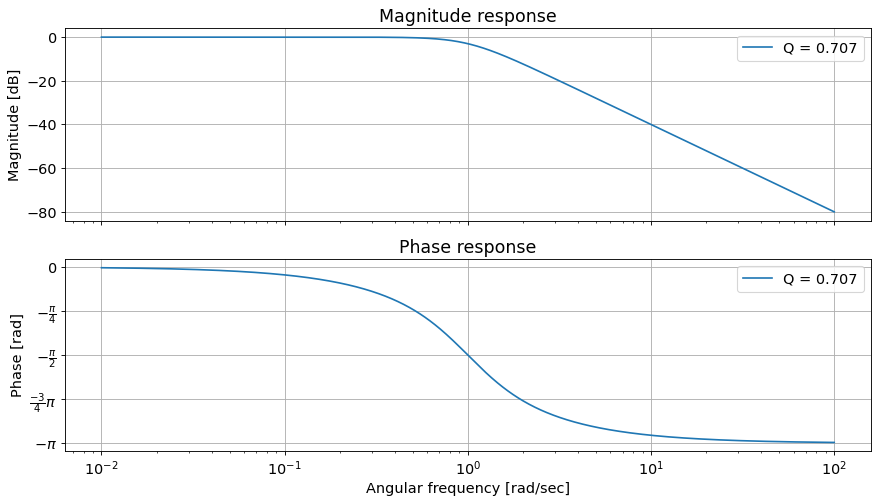

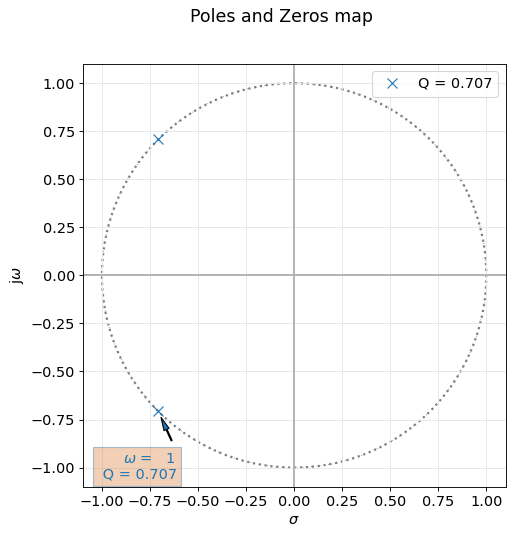

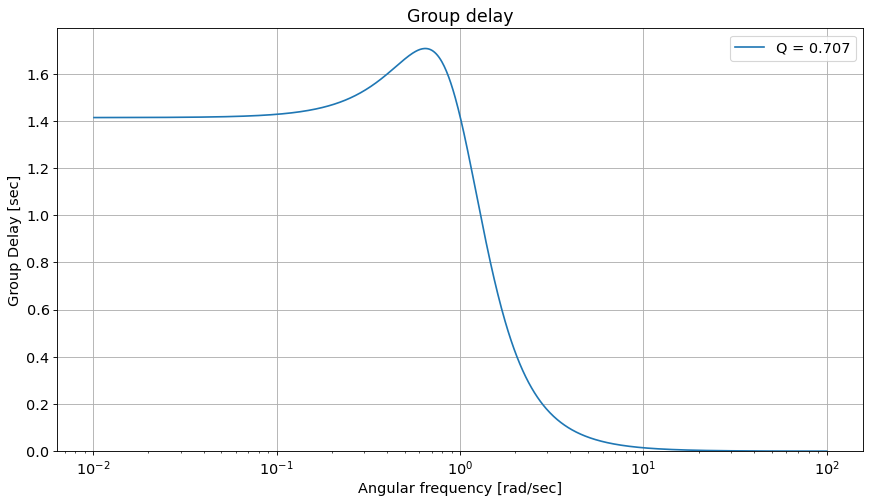

In [4]:
     
Q = np.sqrt(2)/2
w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )
  
# Hasta ahora lo hicimos así ...
#
# _, axes_hdl = bodePlot(H1)

# plt.sca(axes_hdl[0])

# pzmap(H1)

# Otra forma de analizar el sistema H1, con una función
# de más alto nivel.
analyze_sys(H1, sys_name='Q = {:3.3f}'.format(Q))



**4)** Finalmente, una vez que corroboramos que la función transferencia responde a la expresión matemática obtenida del modelo circuital, solo resta **simular el comportamiento total del circuito**. Como dijimos originalmente en esta instancia estaríamos validando el análisis conceptual del punto 1 y 2) y la simulación matemática del punto 3). Lo primero es dibujar la red en **LTspice**, e indicar las características de la simulación.

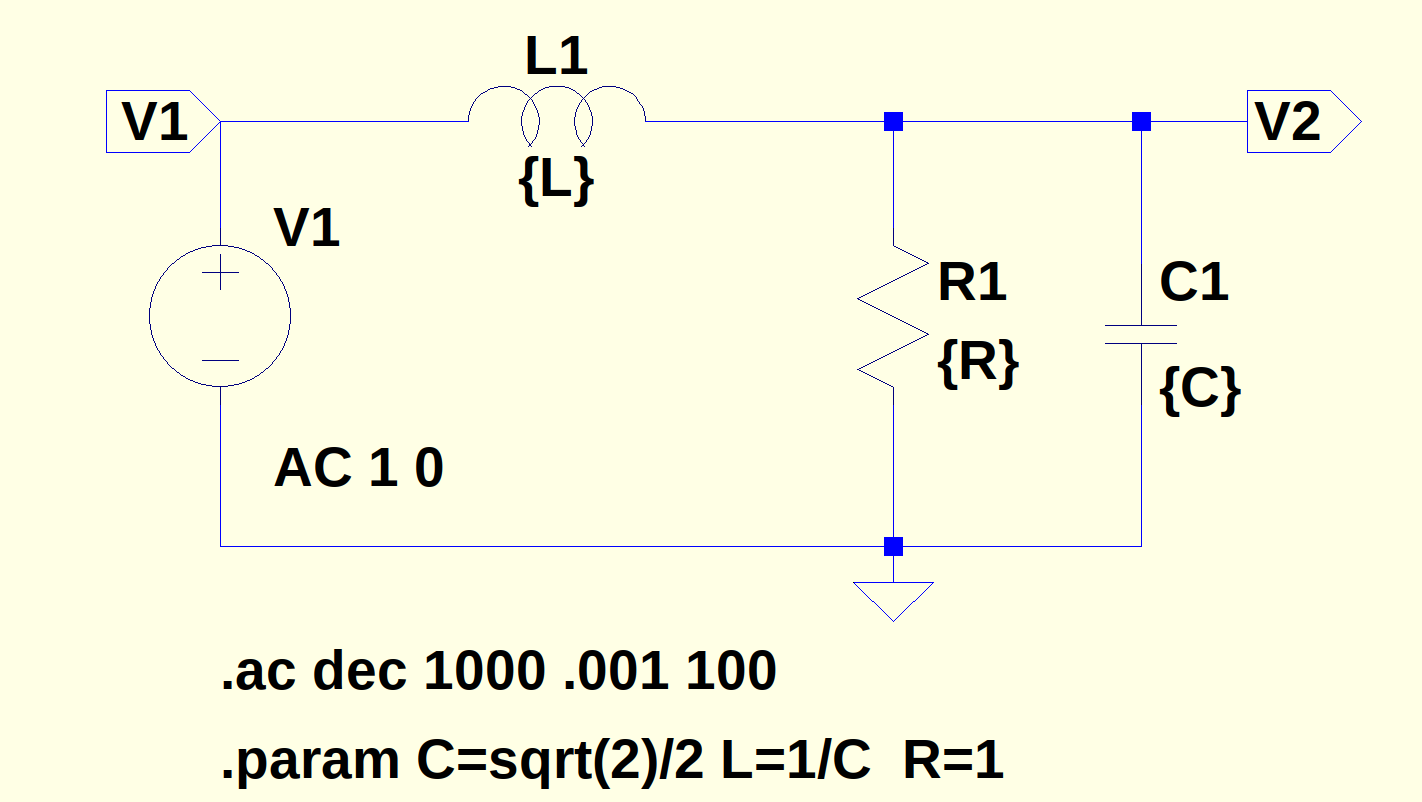

Notar la conveniencia de tener los valores de los componentes  parametrizados. Una posibilidad es la definición de otros parámetros, como en nuestro caso, podríamos definir los valores de $\omega_0$ y $Q$ para luego definir R, L y C en función de éstos. Otra opción, podría ser definir las normas de frecuencia e impedancia requeridos, para luego analizar la red normalizada y desnormalizada fácilmente. Te dejamos un posible esquemático [aquí](https://github.com/marianux/tc2/blob/main/SOS_pasabajo_simple.asc).

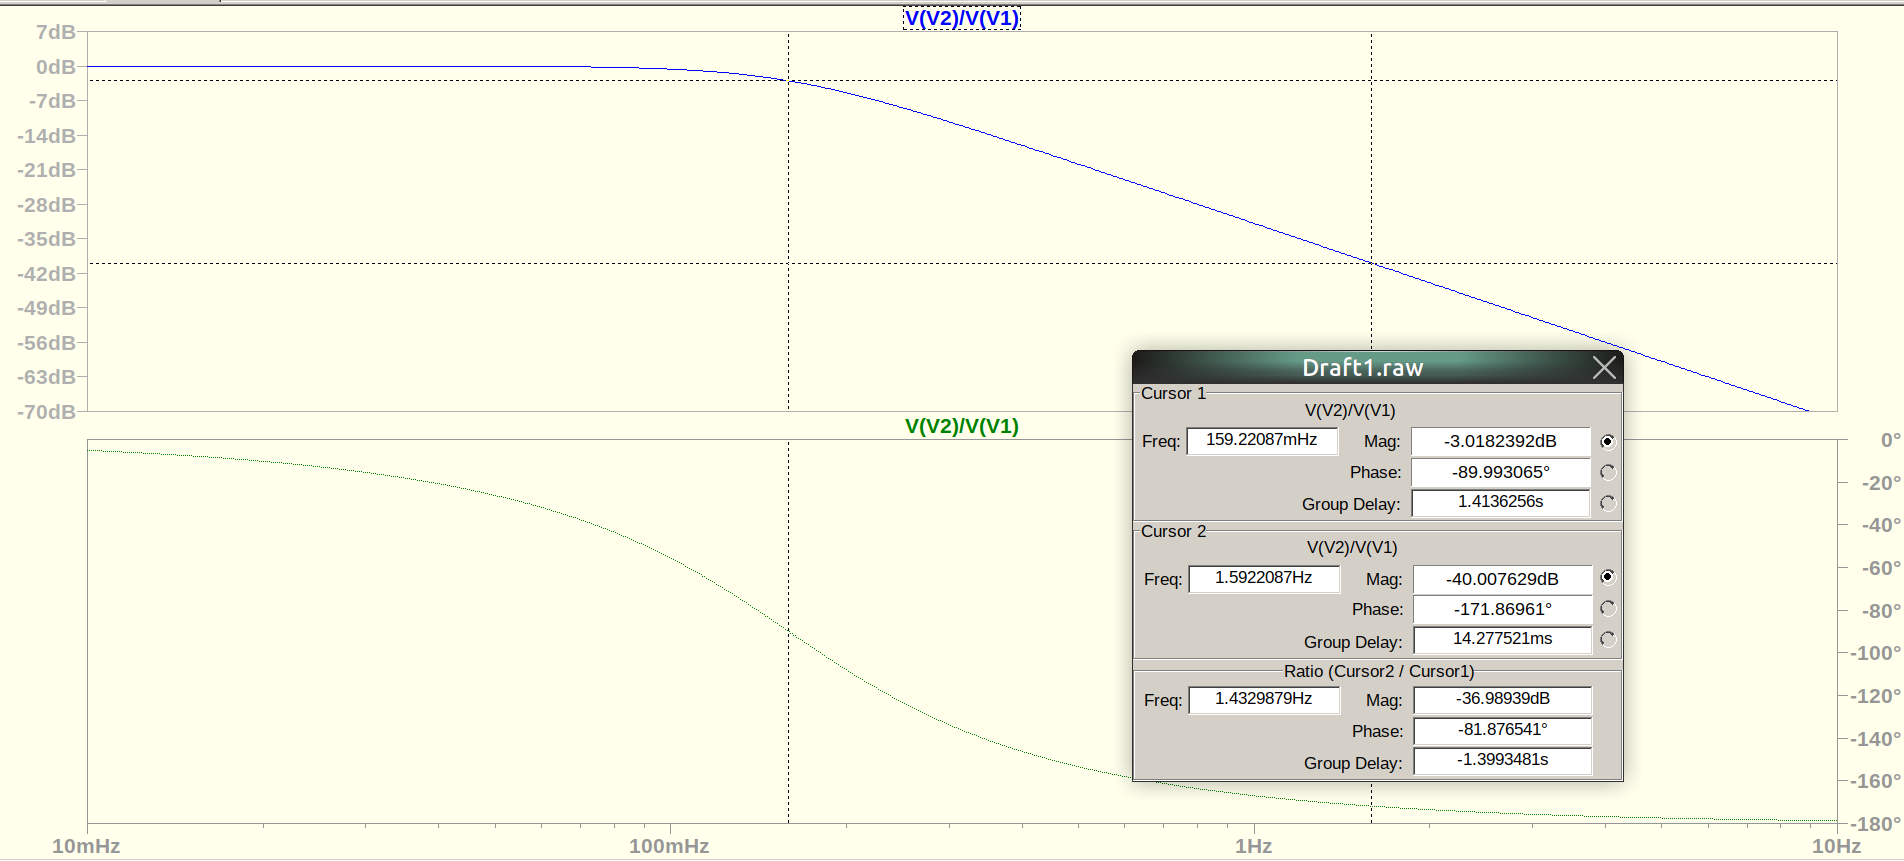

En este caso simulamos la respuesta de módulo y fase en una misma ventana, muchas veces, por limitaciones estéticas del LTspice esto no es lo más conveniente, y se prefiere presentar ambas respuestas por separado.

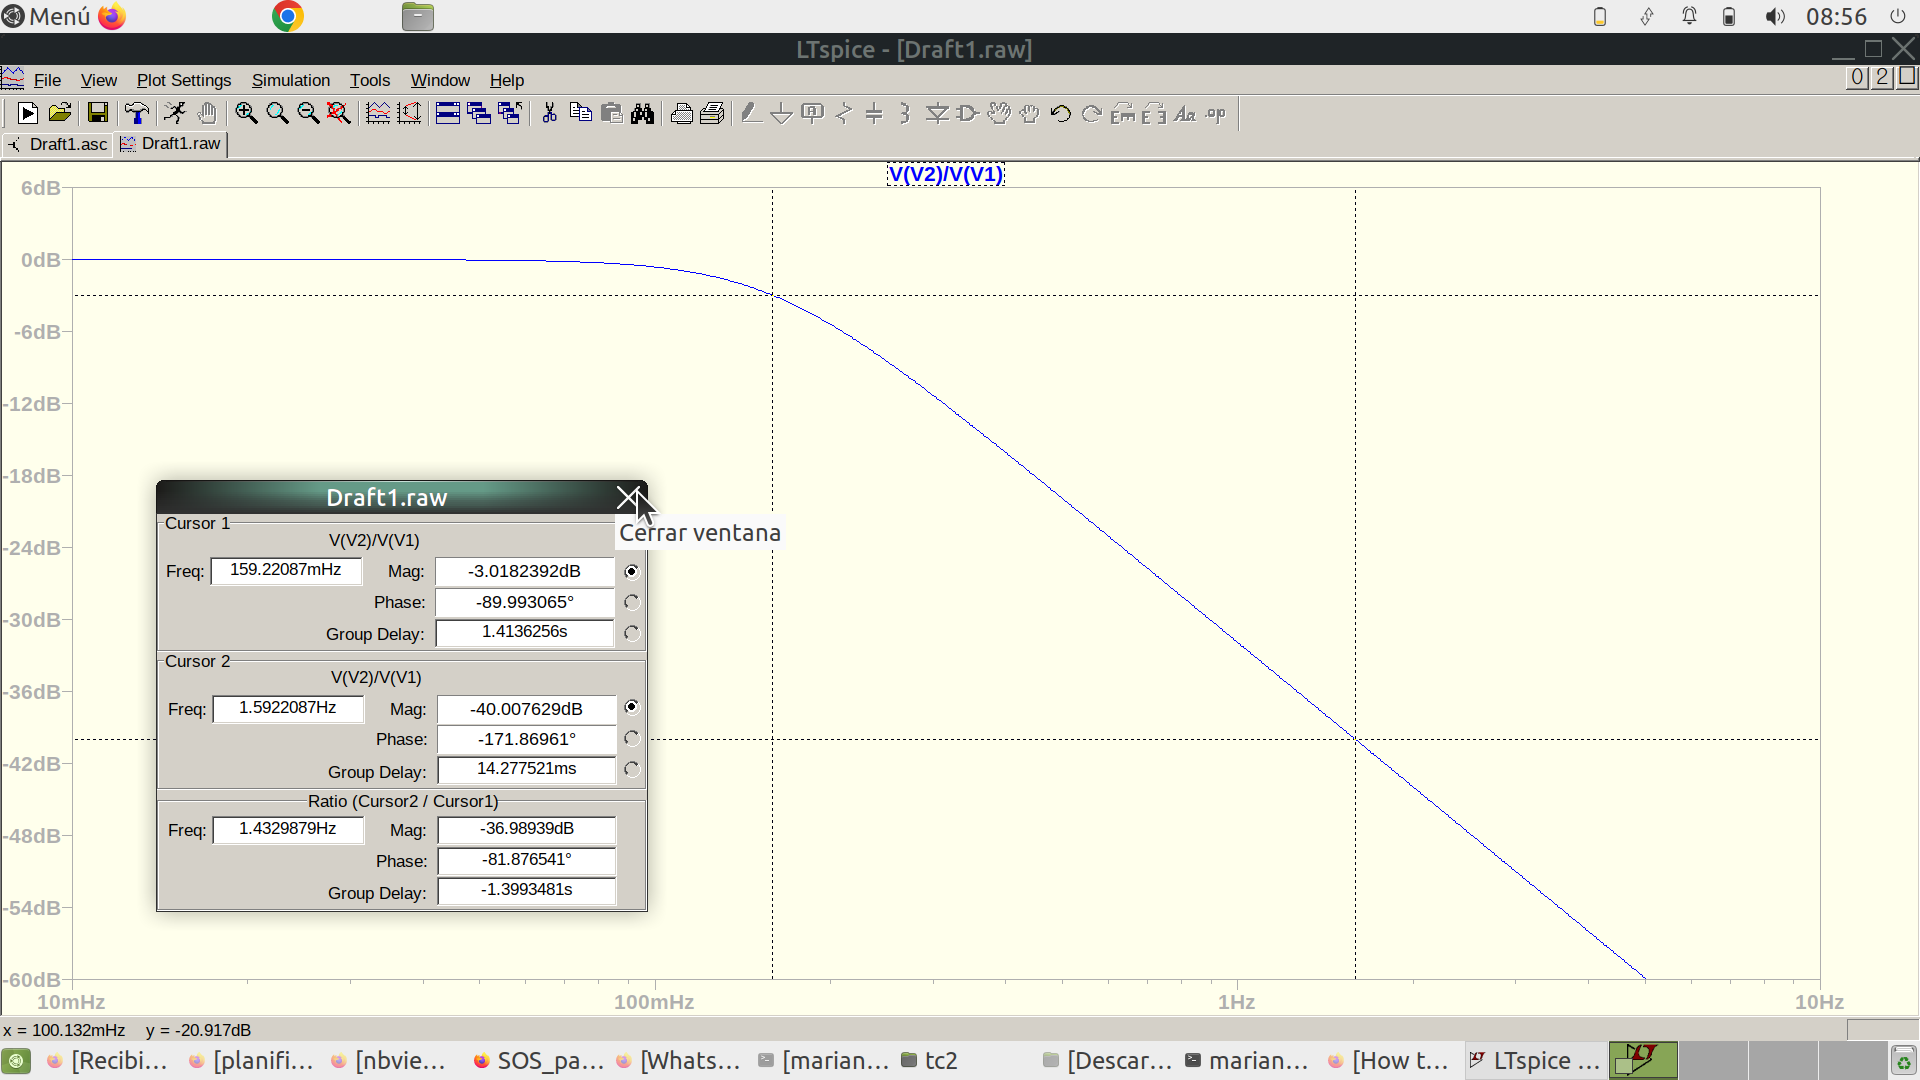

La respuesta de módulo por separado se ve bastante más clara, y gracias a los cursores, podemos hacer mediciones directas sobre la curva. Notar que situamos dos cursores sobre la curva: 

1. En la frecuencia de corte $f = \frac{\omega}{2.\pi}$ donde $\omega = \omega_0 = \sqrt{\frac{1}{L.C}}$. Luego como $\omega = 1 \frac{\mathrm{rad}}{\mathrm{s}}$ luego $f = \frac{1}{2.\pi} \approx $ **0.159 Hz**. Este número cobra **vital importancia** dado que LTspice no tiene forma de representar la pulsación en lugar de la frecuencia, y será la **frecuencia de corte de las redes normalizadas**. La transferencia en este punto es de $Q$ *veces* ($\frac{\sqrt{2}}{2}$) ó -3 dB según se ve en la gráfica.

2. Una década después de la frecuencia de corte, a 1.59 Hz, la pendiente de la respuesta del pasabajo ya es notoria, exibiendo una atenuación de $-20.\mathrm{N} \frac{\mathrm{dB}}{\mathrm{dec}}$ siendo N el orden de la transferencia. En este caso $\mathrm{N} = 2$, resultando -40 dB por década que se corroboran en la simulación. 

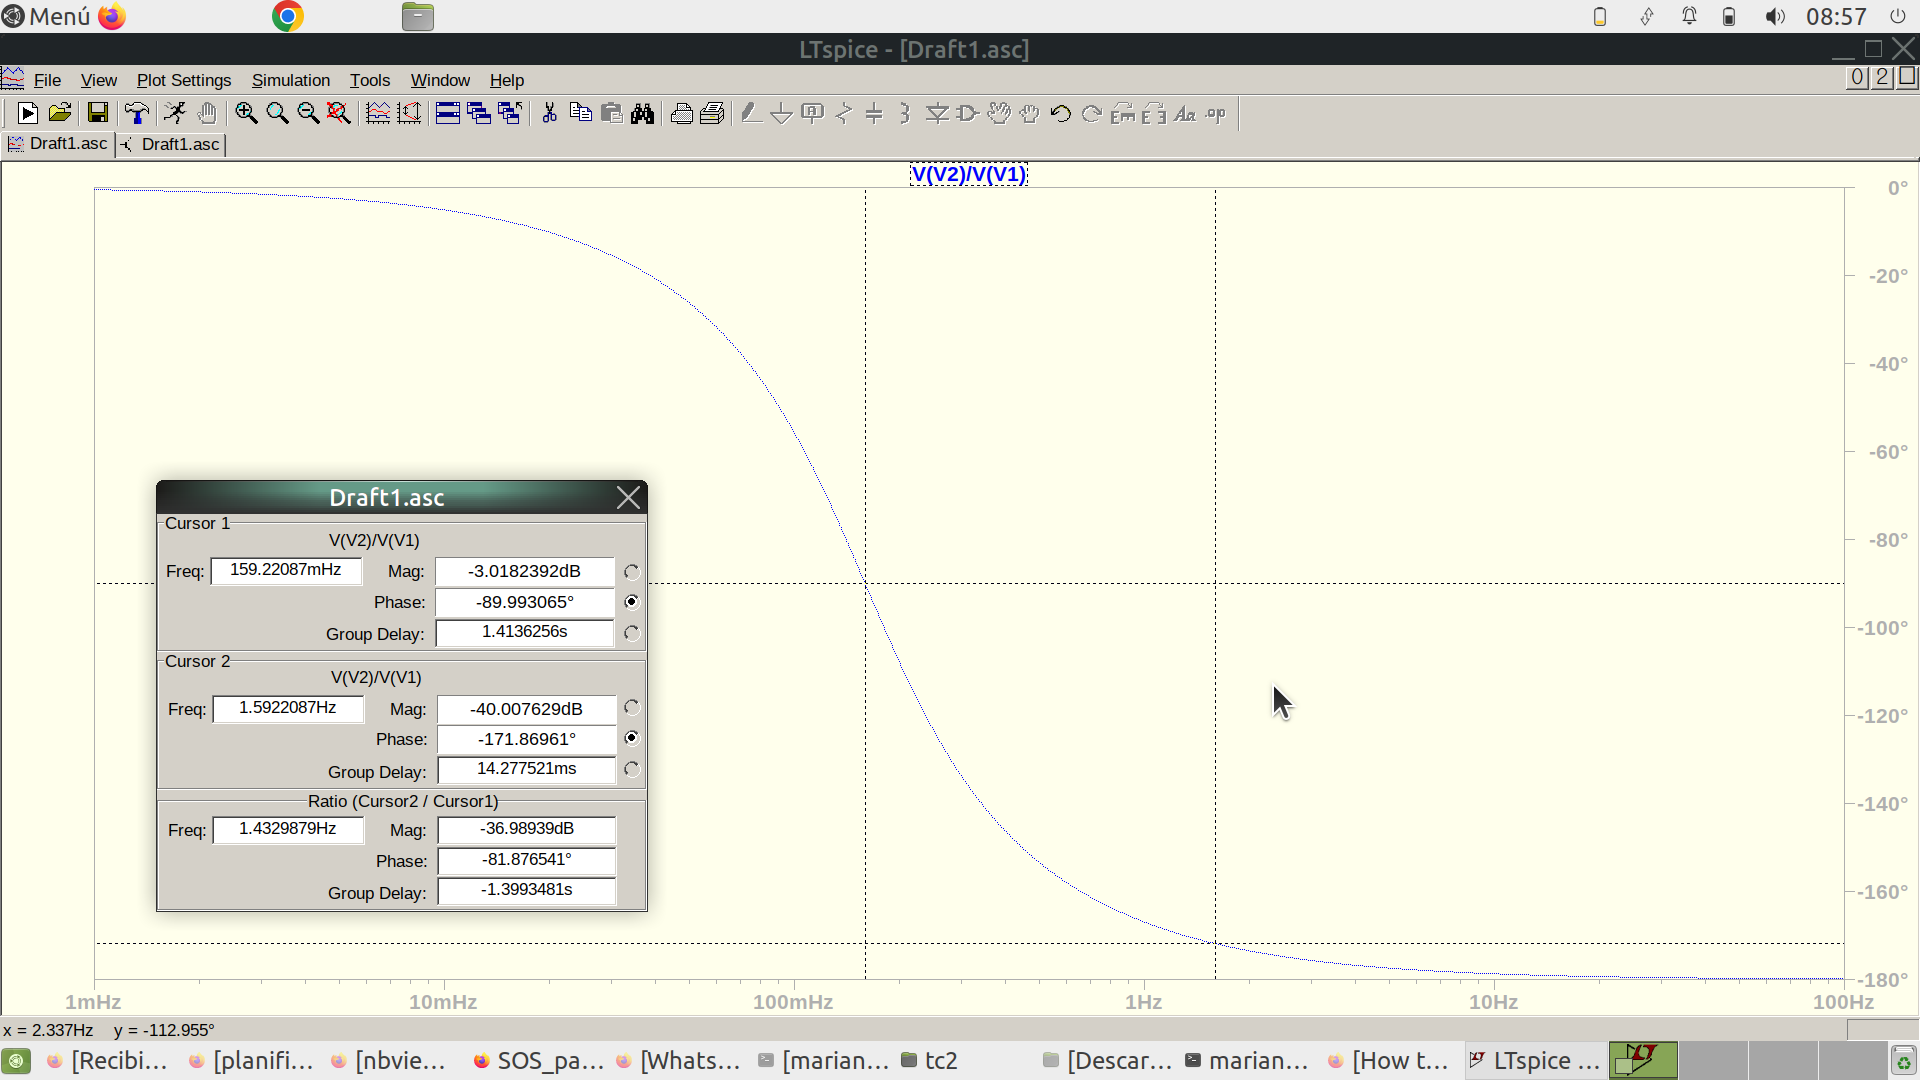

La respuesta de fase corrobora el esquema planteado en la resolución teórica, en la simulación numérica, que indicaba una variación total de $-\frac{\pi}{2}.\mathrm{N} \frac{\mathrm{rad}}{\mathrm{dec}}$, en este caso la variación total será de $\pi$ radianes, y para la frecuencia de corte debería darse la mitad de la variación.

## Observaciones y Conclusiones

En este documento se mostró la metodología de trabajo que deberán implementar los estudiantes de TC2. Esta consiste en cumplimentar tres de los cuatro puntos descriptos más arriba:

1. Desarrollo en lápiz y papel
2. Simulación simbólica (si corresponde) y numérica.
3. Simulación circuital.

En este caso la simulación simbólica no corresponde por lo simple de la resolución algebraica. Más adelante, cuando las redes se tornen más complejas, el álgebra también escalará y las herramientas de simulación simbólica podrían ayudar.

Por último, pero no menos importante, todos los resultados que se incorporen a tus presentaciones deben ser acompañados de una explicación o un comentario, cuando se correspondan con lo esperado; o una discusión o reflexión cuando el resultado no corrobore los pasos previos. (Casi) **NUNCA** una imagen se explica por sí misma y debe ser acompañada de **marcadores, mediciones y finalmente una explicación**.


## Cosas para seguir experimentando

 * El sobreimpulso de la función transferencia es apróximadamente $Q$ (Schaumann eq. 4.32).
 * La fase siempre arranca de 0, pasa por $-\pi/2$ y tiende asintóticamente a $-\pi$, independientemente de $Q$ (Schaumann eq. 4.33).
 * El parámetro $Q=\frac{1}{2\cos(\psi)}$ controla inversamente la cercanía de las singularidades al eje $j\omega$.
 * Para el caso normalizado, el lugar geométrico de los polos es la circunsferencia unitaria.
 * El cambio de $\omega_0$ no afecta la forma de las gráficas, sí la escala.
 * [Más sobre LTspice](https://www.analog.com/en/education/education-library/videos/video-series/ltspice-essentials-tutorial.html)